# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

from keras.datasets import cifar100

import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
x_train.shape
# train dataset contains of 50 000 images of size 32*32 pixels

(50000, 32, 32, 3)

In [4]:
x_test.shape
# test dataset contains of 10 000 images of size 32*32 pixels

(10000, 32, 32, 3)

In [5]:
len(class_names)

100

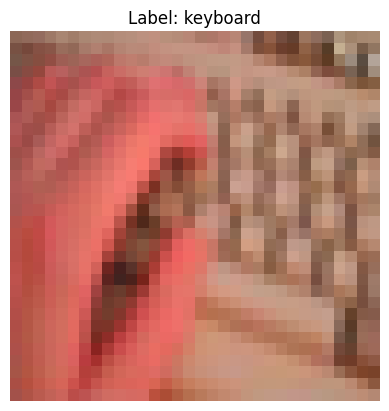

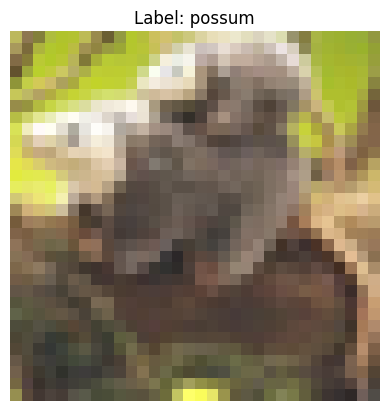

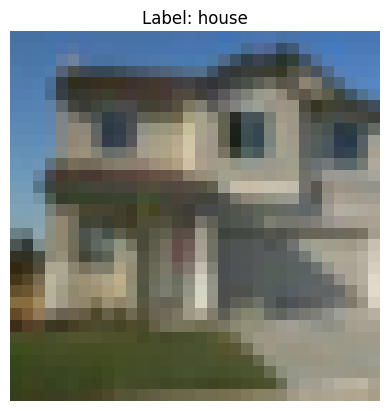

In [6]:
#selecting random images 101, 129, 566
for i in [101,129,566]:
  index = i
  image = x_train[index]
  plt.imshow(image)
  plt.title(f"Label: {class_names[y_train[i][0]]}")
  plt.axis("off")
  plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
# 1. normalize images, so that they all have pixel values from 0 to 1
# divide by 255 as RGB pixel values are in range [0,255]
# before normalization
x_train[101][0][0]

array([140, 103,  86], dtype=uint8)

In [8]:
x_train_n = x_train/255
x_train_n[101][0][0]

array([0.54901961, 0.40392157, 0.3372549 ])

In [9]:
x_test_n = x_test/255

In [10]:
#2. convert the labels to one-hot encoded vectors
y_train[0]

array([19])

In [11]:
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
#3. split the training set into training and validation set

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    x_train_n,
    y_train,
    test_size=0.2,
    random_state=1011
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(100, activation = "softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy - the same we used in lab 1 as it can be used for multi-class classification with one-hot encoded labels
- <b>Optimizer:</b> using sgd as we are dealing with large dataset

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="sgd",
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [15]:
# we can use early stopping option: when validation loss stops improving, training stopped
early_stopping = EarlyStopping(
    monitor = "val_loss", # what we are monitoring, val_loss is default https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
    patience = 5, # number of epochs to wait before stopping
    restore_best_weights = True
    )

history = model.fit(
    X_train_ts,
    y_train_ts,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_ts, y_test_ts),
    callbacks = [early_stopping]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0130 - loss: 4.5936 - top_k_categorical_accuracy: 0.0639 - val_accuracy: 0.0350 - val_loss: 4.4802 - val_top_k_categorical_accuracy: 0.1288
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0508 - loss: 4.3344 - top_k_categorical_accuracy: 0.1777 - val_accuracy: 0.0844 - val_loss: 4.0466 - val_top_k_categorical_accuracy: 0.2541
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1019 - loss: 3.9487 - top_k_categorical_accuracy: 0.2941 - val_accuracy: 0.1250 - val_loss: 3.8082 - val_top_k_categorical_accuracy: 0.3401
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1408 - loss: 3.7135 - top_k_categorical_accuracy: 0.3674 - val_accuracy: 0.1517 - val_loss: 3.6561 - val_top_k_categorical_accuracy: 0.3840
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1672 - loss: 3.5755 - top_k_categorical_accuracy: 0.4059 - val_accuracy: 0.1769 - val_loss: 3.5225 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 35.1%
- <b>Other metric:</b> top k accuracy
- <b>Reason for selection:</b> checks if true label among top-5 predicted classes
- <b>Value of metric:</b> 64.4%
- <b>Interpretation of metric value:</b> in 64.4% of cases true label was in the list of top-5 clases based on predicted values


In [ ]:
test_loss, test_accuracy, top_k_accuracy = model.evaluate(x_test_n, y_test, batch_size = 32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3571 - loss: 2.6457 - top_k_categorical_accuracy: 0.6584


In [ ]:
test_accuracy*100

35.58000028133392

In [ ]:
top_k_accuracy*100

65.63000082969666

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

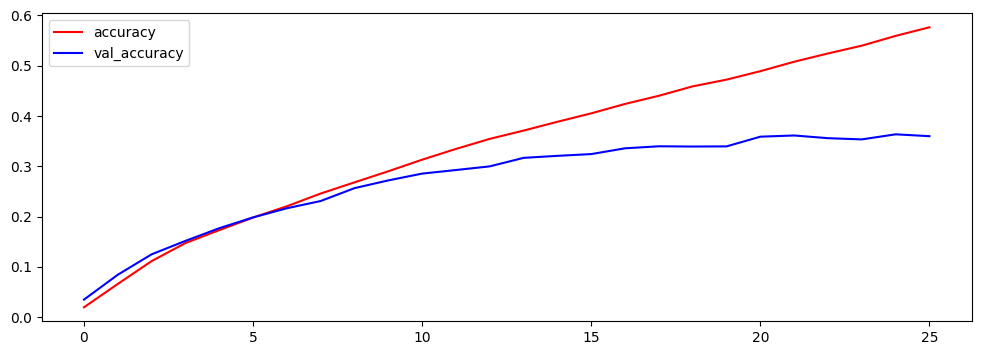

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label="accuracy", color = "red")
plt.plot(history.history['val_accuracy'], label="val_accuracy", color = "blue")
plt.legend();

In [20]:
# plot shows that model performance is improving  as values of accuracy on training set (accuracy) and on validation set(val_accuracy) are increasing
# generally we should focus on validation accuracy as it shows how well model works on unseen data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


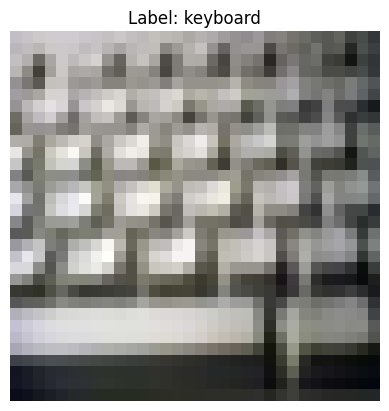

In [21]:
# changing code we used in lab 1

predictions = model.predict(x_test_n)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
# correctly classified instances
corr_classified_indices = np.where(predicted_classes == true_classes)[0]
corr_classified_samples = x_test_n[corr_classified_indices]
corr_classified_labels = predicted_classes[corr_classified_indices]

image = corr_classified_samples[10]
plt.imshow(image)
plt.title(f"Label: {class_names[corr_classified_labels[10]]}")
plt.axis("off")
plt.show()


In [22]:
predictions[corr_classified_indices[10]]

array([1.16146037e-10, 3.45295757e-06, 1.01462911e-05, 2.93542689e-06,
       3.54966069e-05, 2.33947372e-04, 5.82242592e-06, 2.90422463e-07,
       3.25950678e-03, 3.78687655e-05, 4.09110449e-04, 4.58408795e-05,
       1.59906056e-02, 4.37302068e-02, 1.27565672e-05, 2.87308035e-06,
       3.55272728e-04, 2.19608028e-05, 2.69041288e-06, 3.32766081e-06,
       3.11329336e-06, 1.80334042e-04, 2.12204475e-02, 1.67320110e-07,
       1.82631488e-09, 2.30063539e-04, 9.79526449e-05, 8.03812814e-04,
       5.02383955e-07, 1.60992004e-05, 1.01615142e-05, 8.54217461e-08,
       3.44374166e-05, 8.68323114e-05, 3.19689971e-05, 2.38559755e-06,
       1.51017900e-07, 3.77785750e-02, 3.00038082e-05, 6.10426843e-01,
       8.38931956e-05, 1.43888488e-03, 6.56595570e-04, 9.73525175e-07,
       6.81779566e-05, 1.58973577e-04, 1.22272422e-06, 6.19936145e-07,
       8.30859135e-05, 4.96248333e-07, 4.55543850e-05, 4.31766694e-06,
       1.75265356e-07, 4.97348873e-09, 7.25167993e-05, 3.86029569e-05,
      

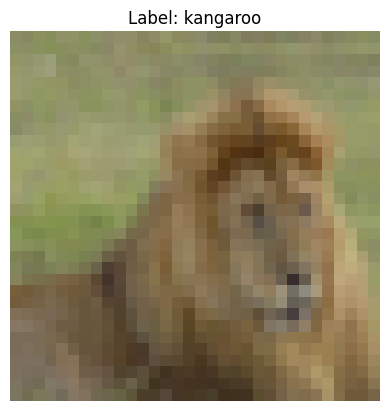

In [23]:
# incorrectly classified instances
mis_classified_indices = np.where(predicted_classes != true_classes)[0]
mis_classified_samples = x_test_n[mis_classified_indices]
mis_classified_labels = predicted_classes[mis_classified_indices]

image = mis_classified_samples[10]
plt.imshow(image)
plt.title(f"Label: {class_names[mis_classified_labels[10]]}")
plt.axis("off")
plt.show()

In [24]:
predictions[mis_classified_indices[10]]

array([1.22962461e-04, 2.09761620e-03, 1.13571633e-03, 2.81816348e-02,
       2.83514503e-02, 2.32794858e-03, 2.61276979e-02, 6.55313395e-03,
       1.33338049e-02, 3.32187070e-03, 2.49755871e-03, 1.95847033e-03,
       2.05454347e-03, 1.66144149e-04, 3.00468295e-03, 1.02463393e-02,
       5.22623304e-04, 6.24290842e-05, 4.63570002e-03, 1.57152191e-02,
       1.73801964e-03, 1.29439794e-02, 1.86923426e-03, 7.26573198e-05,
       6.45307871e-03, 1.60404411e-03, 7.53403734e-03, 1.30855357e-02,
       1.98995881e-03, 1.85030978e-02, 7.20818207e-05, 1.58754680e-02,
       3.97874787e-03, 5.73077658e-03, 2.93915514e-02, 7.66529178e-04,
       2.54148990e-03, 2.39264002e-04, 1.02686241e-01, 7.26722879e-04,
       8.75314116e-04, 7.02259887e-04, 4.11909819e-02, 3.70548628e-02,
       3.34147178e-02, 2.24893400e-03, 1.15788158e-03, 3.65001964e-04,
       1.95398025e-04, 5.08999256e-06, 2.95671504e-02, 7.02255219e-03,
       8.91755772e-05, 1.00582474e-04, 6.04036963e-04, 1.04683265e-02,
      

In [ ]:
# classification probabilities indicate the probability of image being one of the 100 categories, so we have 100 values in the array each of which is probability

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [34]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "softmax"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,092 (2.13 MB)

 Trainable params: 556,900 (2.12 MB)

 Non-trainable params: 192 (768.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(
    loss='categorical_crossentropy',
    optimizer="sgd",
    metrics=['accuracy', 'top_k_categorical_accuracy']
)
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    restore_best_weights = True
    )
lr_reducer = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6             )
history = model.fit(
    X_train_ts,
    y_train_ts,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_ts, y_test_ts),
    callbacks = [early_stopping, lr_reducer]
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.0112 - loss: 4.7425 - top_k_categorical_accuracy: 0.0540 - val_accuracy: 0.0197 - val_loss: 4.5339 - val_top_k_categorical_accuracy: 0.0905 - learning_rate: 0.0100
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0192 - loss: 4.5530 - top_k_categorical_accuracy: 0.0805 - val_accuracy: 0.0387 - val_loss: 4.4159 - val_top_k_categorical_accuracy: 0.1492 - learning_rate: 0.0100
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0259 - loss: 4.4864 - top_k_categorical_accuracy: 0.1087 - val_accuracy: 0.0384 - val_loss: 4.3275 - val_top_k_categorical_accuracy: 0.1660 - learning_rate: 0.0100
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0318 - loss: 4.4150 - top_k_categorical_accuracy: 0.1292 - val_accuracy: 0.0521 - val_loss: 4.3407 - val_top_k_categorical_accuracy: 0.1838 - learning_rate: 0.0100
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accurac

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

In [30]:
test_loss, test_accuracy, top_k_accuracy = model.evaluate(x_test_n, y_test, batch_size = 32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4460 - loss: 2.1533 - top_k_categorical_accuracy: 0.7427


In [31]:
test_accuracy*100

44.119998812675476

In [ ]:
top_k_accuracy*100

65.63000082969666

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.